In [1]:
import pandas as pd

from idealista_utils import *

import datetime

In [2]:
country = 'es' #values: es, it, pt
locale = 'es' #values: es, it, pt, en, ca
language = 'es' #
max_items = '100'
operation = 'sale' 
property_type = 'homes'
order = 'priceDown' 
# Circle of extraction here: https://www.mapdevelopers.com/draw-circle-tool.php?circles=%5B%5B2786.62%2C40.4351329%2C-3.6923214%2C%22%23AAAAAA%22%2C%22%23000000%22%2C0.4%5D%5D
center = '40.4351329,-3.6923214' 
distance = '2786'
sort = 'asc'
bankOffer = 'false'
maxPrice = '350000'
minPrice = '100000'

df_tot = pd.DataFrame()
limit = 20
for i in range(1,limit):
    url = ('https://api.idealista.com/3.5/'+country+'/search?operation='+operation+#"&locale="+locale+
           '&maxItems='+max_items+
           '&order='+order+
           '&center='+center+
           '&distance='+distance+
           '&propertyType='+property_type+
           '&maxPrice='+maxPrice+
           '&minPrice='+minPrice+
           '&sort='+sort+ 
           '&numPage=%s'+
           '&language='+language) %(i)  
    a = search_api(get_oauth_token(), url)
    df = pd.DataFrame.from_dict(a['elementList'])
    df_tot = pd.concat([df_tot,df])

df_tot = df_tot.reset_index()

In [3]:
df_tot.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,950,NaN,NaN,NaN,24.5,14.4385,0,12,24.5,37,49
address,950,577,barrio Malasaña-Universidad,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,950,NaN,NaN,NaN,1.08211,0.282238,1,1,1,1,3
country,950,1,es,950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
detailedType,950,4,{'typology': 'flat'},810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance,950,707,1795,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
district,950,8,Centro,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exterior,950,2,True,479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
externalReference,821,788,GA-V-1199,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floor,911,14,bj,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


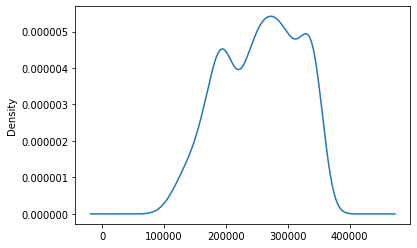

In [4]:
df_tot.price.plot(kind='kde')

In [5]:
df_tot.to_csv('extractions/extraction_{}.csv'.format(datetime.date.today()))